Wall_Time: 15.5 hours
Samples: 40056705


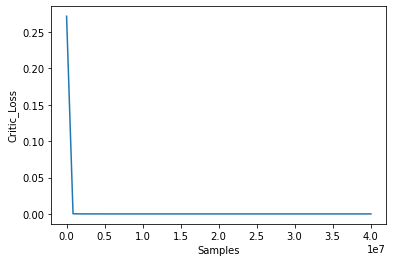

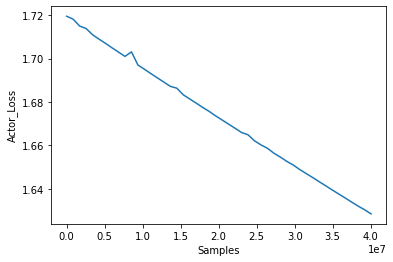

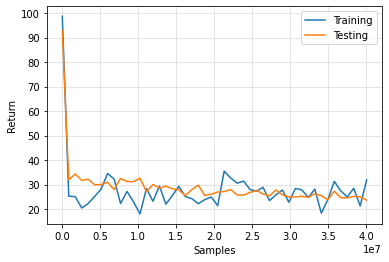

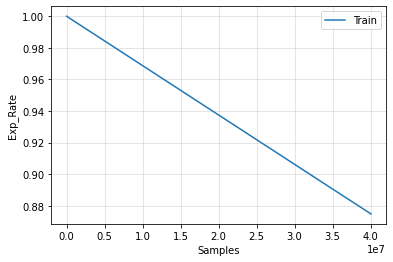

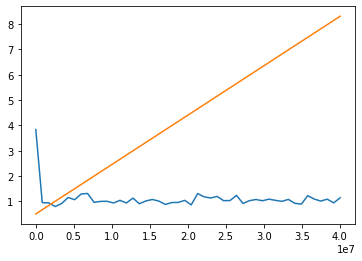

In [31]:
import sys
sys.path.append('../DeepMimic')
from util.logger import Logger
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_folder = './output/dog3d_drl_finetuning_heading_control/'

def read_log_files(filenames):
    log = None
    Iter_Step = 200
    for i, filename in enumerate(filenames):
        log_part = np.genfromtxt(filename, dtype=None, names=True, encoding='utf-8')
        if log is None:
            log = log_part
        else:
            log_intermediate = dict()
            for j, key in enumerate(list(log_part.dtype.names)):
                if 'Iteration' in key:
                    log_intermediate[key] = np.concatenate((log[key], log_part[key] + log[key][-1] + Iter_Step), axis=0)
                elif 'Wall_Time' in key:
                    log_intermediate[key] = np.concatenate((log[key], log_part[key] + log[key][-1]), axis=0)
                else:
                    log_intermediate[key] = np.concatenate((log[key], log_part[key]), axis=0)
            log = log_intermediate
    return log


A = read_log_files([output_folder+'agent0_log.txt'])

print('Wall_Time: %.1f hours' % (A['Wall_Time'][-1]))
print('Samples: %d' % (A['Samples'][-1]))

x_label = 'Samples'

y_label = 'Critic_Loss'
fig = plt.figure()
plt.plot(A[x_label], A[y_label])
plt.ylabel(y_label)
plt.xlabel(x_label)

y_label = 'Actor_Loss'
fig = plt.figure()
plt.plot(A[x_label], A[y_label])
plt.ylabel(y_label)
plt.xlabel(x_label)

y_label = 'Return'
fig = plt.figure()
plt.plot(A[x_label], A['Train_Return'], label='Training')
plt.plot(A[x_label], A['Test_Return'], label='Testing')
# plt.plot(A[x_label], np.ones(len(A['Test_Return'])) * 600, linestyle='--', color='black', alpha=0.5, label='Maximum Return')
plt.legend()
plt.grid(alpha=0.4)
plt.ylabel(y_label)
plt.xlabel(x_label)
# fig.savefig(output_folder+'training_result.png', format='png', dpi=200, bbox_inches='tight')

y_label = 'Exp_Rate'
fig = plt.figure()
plt.plot(A[x_label], A['Exp_Rate'], label='Train')
plt.legend()
plt.grid(alpha=0.4)
plt.ylabel(y_label)
plt.xlabel(x_label)

max_episode_lengths = [0] * len(A['Samples'])
time_lim = 0.5
time_end_lim = 20
anneal_samples = 100000000
for i, samples in enumerate(A['Samples']):
    if samples > anneal_samples:
        max_episode_lengths[i] = time_end_lim
    else:
        t = samples / anneal_samples
        max_episode_lengths[i] = t * time_end_lim + (1-t) * time_lim

y_label = 'Train_Path_Length'
fig = plt.figure()
plt.plot(A['Samples'], A['Train_Path_Length'], label='Path Length')
plt.plot(A['Samples'], max_episode_lengths, label='Max Episode Length')

plt.show()

In [7]:
import numpy as np

goals = np.load('output/dog3d_gan_control_adapter_speed_control/goals.npy')
print(goals.shape)

(370183, 3)


In [13]:
import glob

def _parse_record_data(filename):
    trajectories = []    
    with open(filename) as fin:
        lines = fin.readlines()
        i = 0
        records = []
        while i < len(lines):
            if lines[i] == '\n':
                trajectories += [records]
                records = []
                i += 1
            else:
                state = np.fromstring(lines[i], dtype=np.float32, sep=' ')
                goal = np.fromstring(lines[i + 1], dtype=np.float32, sep=' ')
                weight = np.fromstring(lines[i + 2], dtype=np.float32, sep=' ')

                record = [state, goal, weight]
                records += [record]
                i += 3

    return trajectories

trajectories = []
record_files = glob.glob('output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/*.txt')
for record_file in record_files:
    print('Read file ' + record_file)
    _trajectories = _parse_record_data(record_file)
    trajectories += _trajectories

Read file output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/agent0_records_0000000006.txt
Read file output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/agent0_records_0000000002.txt
Read file output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/agent0_records_0000000008.txt
Read file output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/agent0_records_0000000000.txt
Read file output/dog3d_gan_control_adapter_speed_control/intermediate/agent0_records/agent0_records_0000000004.txt


In [27]:
print(len(trajectories))
for i, record_data in enumerate(trajectories):
    if i >= 1:
        break
        
    print(record_data[:][2])

116
[array([ 4.68664497e-01,  1.16234794e-02,  1.56052143e-03,  4.27972004e-02,
        1.01001702e-01,  6.94511354e-01, -7.12307572e-01, -8.39688070e-03,
       -2.76078023e-02, -1.07751666e-02, -9.02591124e-02,  5.15676975e-01,
       -4.14575547e-01, -4.21148330e-01,  6.20353520e-01, -5.08768819e-02,
       -3.58737297e-02, -2.92058736e-01,  4.33285207e-01, -5.14090478e-01,
       -4.98625100e-01,  5.47126949e-01, -4.95400168e-02, -5.52950092e-02,
       -4.72643137e-01,  4.91383582e-01, -4.59121794e-01, -5.14149189e-01,
        5.32353282e-01, -4.23788130e-02, -6.36288375e-02, -6.31475031e-01,
        5.04642129e-01, -4.94463861e-01,  4.42983896e-01, -5.51912248e-01,
       -3.28622349e-02, -7.14850873e-02, -7.10517585e-01,  5.04642129e-01,
       -4.94463861e-01,  4.42983896e-01, -5.51912248e-01, -1.04497604e-01,
       -1.07772067e-01, -4.02685493e-01,  3.82345408e-01, -2.88060695e-01,
       -3.18208367e-01,  8.18276525e-01, -1.18933439e-01, -2.02894762e-01,
       -4.19972748e-